In [1]:
import tensorflow as tf
from pathlib import Path
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(precision=4)

In [2]:
from sklearn.utils import shuffle

In [3]:
IMG_SIZE=(224,224)
BATCH_SIZE=32

In [4]:
dfAtopi = pd.DataFrame(data={"imagePath":[str(filePath) for filePath in Path("/home/ahmed/work/atopiWork/masks_atopi_skinSegmentation").rglob("*")]})
dfNonAtopi= pd.DataFrame(data={"imagePath":[str(filePath) for filePath in Path("/home/ahmed/work/atopiWork/masks_NonAtopiImages_augmented").rglob("*")]})

In [5]:
dfAtopi["label"] = 1
dfNonAtopi["label"] = 0

In [6]:
dfAtopi

,imagePath,label
0,/home/ahmed/work/atopiWork/masks_atopi_skinSeg...,1
1,/home/ahmed/work/atopiWork/masks_atopi_skinSeg...,1
2,/home/ahmed/work/atopiWork/masks_atopi_skinSeg...,1
3,/home/ahmed/work/atopiWork/masks_atopi_skinSeg...,1
4,/home/ahmed/work/atopiWork/masks_atopi_skinSeg...,1
...,...,...
386,/home/ahmed/work/atopiWork/masks_atopi_skinSeg...,1
387,/home/ahmed/work/atopiWork/masks_atopi_skinSeg...,1
388,/home/ahmed/work/atopiWork/masks_atopi_skinSeg...,1
389,/home/ahmed/work/atopiWork/masks_atopi_skinSeg...,1


In [7]:
dfNonAtopi

,imagePath,label
0,/home/ahmed/work/atopiWork/masks_NonAtopiImage...,0
1,/home/ahmed/work/atopiWork/masks_NonAtopiImage...,0
2,/home/ahmed/work/atopiWork/masks_NonAtopiImage...,0
3,/home/ahmed/work/atopiWork/masks_NonAtopiImage...,0
4,/home/ahmed/work/atopiWork/masks_NonAtopiImage...,0
...,...,...
251,/home/ahmed/work/atopiWork/masks_NonAtopiImage...,0
252,/home/ahmed/work/atopiWork/masks_NonAtopiImage...,0
253,/home/ahmed/work/atopiWork/masks_NonAtopiImage...,0
254,/home/ahmed/work/atopiWork/masks_NonAtopiImage...,0


In [8]:
dfAtopi = shuffle(dfAtopi)
dfNonAtopi = shuffle(dfNonAtopi)

In [9]:
dfAtopiBalanced = dfAtopi[:256]

In [10]:
dfAtopiBalanced

,imagePath,label
52,/home/ahmed/work/atopiWork/masks_atopi_skinSeg...,1
216,/home/ahmed/work/atopiWork/masks_atopi_skinSeg...,1
386,/home/ahmed/work/atopiWork/masks_atopi_skinSeg...,1
282,/home/ahmed/work/atopiWork/masks_atopi_skinSeg...,1
195,/home/ahmed/work/atopiWork/masks_atopi_skinSeg...,1
...,...,...
154,/home/ahmed/work/atopiWork/masks_atopi_skinSeg...,1
54,/home/ahmed/work/atopiWork/masks_atopi_skinSeg...,1
182,/home/ahmed/work/atopiWork/masks_atopi_skinSeg...,1
254,/home/ahmed/work/atopiWork/masks_atopi_skinSeg...,1


In [11]:
newDf = pd.concat([dfAtopiBalanced, dfNonAtopi], axis=0)

In [12]:
newDf.shape

(512, 2)

In [13]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [14]:
imFilePaths = newDf["imagePath"].to_numpy()
imFileLabels = newDf["label"].to_numpy()

In [15]:
imFileLabels[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
imFilePaths, imFileLabels = unison_shuffled_copies(imFilePaths, imFileLabels)

In [17]:
imFileLabels[:10]

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0])

In [18]:
dataset = tf.data.Dataset.from_tensor_slices((imFilePaths, imFileLabels))

In [19]:
train_ds = tf.data.Dataset.from_tensor_slices((imFilePaths[:450], imFileLabels[:450]))

In [20]:
val_ds = tf.data.Dataset.from_tensor_slices((imFilePaths[450:], imFileLabels[450:]))

In [21]:
imSizeX, imSizeY = IMG_SIZE
def parse_image(filename, label):
  #parts = tf.strings.split(filename, os.sep)
  #label = parts[-2]

  image = tf.io.read_file(filename)
  image = tf.io.decode_jpeg(image)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, [imSizeX, imSizeY])
  return image, label

In [22]:
train_ds =train_ds.map(parse_image, num_parallel_calls=4)
val_ds = val_ds.map(parse_image, num_parallel_calls=4)

In [14]:
dataset = dataset.map(parse_image, num_parallel_calls=4)

In [23]:
train_dataset = train_ds.batch(BATCH_SIZE).shuffle(buffer_size=1000)
validation_dataset = val_ds.batch(BATCH_SIZE).shuffle(buffer_size=1000)

In [24]:
for ims, labs in validation_dataset.take(100):
    print(labs.shape)

(32,)
(30,)


In [93]:
list(dataset.as_numpy_iterator())[0]

(array([[[0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    ],
         ...,
         [0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    ]],
 
        [[0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    ],
         ...,
         [0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    ]],
 
        [[0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    ],
         ...,
         [0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    ]],
 
        ...,
 
        [[0.9838, 0.9171, 0.8543],
         [0.9779, 0.9112, 0.8484],
         [0.9833, 0.9166, 0.8539],
         ...,
         [0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    ]],
 
        [[0.9838, 0.9171, 0.8543],
         [0.9782, 0.9115, 0.8487],
       

In [67]:
len([num for _, num in dataset.as_numpy_iterator()])

512

In [15]:
td = dataset.batch(32)

In [95]:
i=0
for arr in td:
    #list(td.as_numpy_iterator())[0]
    print(i)
    i = i +1
    #print(len([arr.numpy() for arr in batch]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [78]:
i = 0
for arr in td:
    #numArr = np.array([arr.numpy() for arr in batch])
    if i ==15:
        numArr = list([n.numpy() for n in arr])
        print(numArr[1].shape)
    i = i + 1

(32,)


In [16]:
td1 = td.take(15)
td2 = td.skip(15).take(1)

In [101]:
for images, labels in td2.take(1):
    print(labels.shape)
    print(images.shape)

(32,)
(32, 224, 224, 3)


In [30]:
image, label = next(iter(dataset))

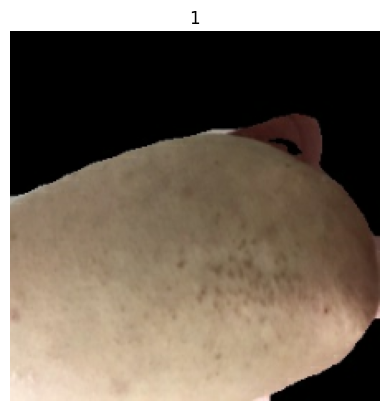

In [31]:
def show(image, label):
  plt.figure()
  plt.imshow(image)
  plt.title(label.numpy())
  plt.axis('off')
  plt.show()  

show(image, label)

In [32]:
def get_dataset_partitions_tf(ds, ds_size, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    if shuffle:
        # Specify seed to always have the same split distribution between runs
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    print("train size", train_size)
    val_size = int(val_split * ds_size)
    print("val size", val_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [82]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(ds=td, ds_size=newDf.shape[0])

train size 409
val size 51


In [89]:
for i, n in val_ds.take(51):
    print(i.shape)
    print(n.shape)

In [55]:
def convertToBatch(datasets, batchSize=32):
    #for dataset in datasets:
    return dataset.batch(batchSize,drop_remainder=True)

In [56]:
train_ds=convertToBatch(train_ds)
val_ds=convertToBatch(val_ds)
test_ds=convertToBatch(test_ds)

In [57]:
list(val_ds.as_numpy_iterator())[0][0].shape

(32, 224, 224, 3)

In [30]:
# i=0
# for images, labels in val_ds.take(51):
#     print([labels.numpy() for labels in batch])
for images, labels in td2.take(110):
    #print([arr.numpy() for arr in batch])
    arr = [label.numpy() for label in labels]
    print(len(arr))

FailedPreconditionError: /home/ahmed/work/atopiWork/masks_atopi_skinSegmentation/accurate; Is a directory
	 [[{{node ReadFile}}]] [Op:IteratorGetNext]

In [77]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

In [78]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [79]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [80]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 1280)


#### Feature extraction

In [81]:
base_model.trainable = False

#### Add a classification head

In [82]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [83]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [84]:
inputs = tf.keras.Input(shape=(224, 224, 3))
#x = data_augmentation(inputs)
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [85]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [86]:
len(model.trainable_variables)

2

In [87]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)

2/2 [==============================] - 1s 17ms/step - loss: 0.7057 - accuracy: 0.5246


In [88]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
15/15 [==============================] - 2s 21ms/step - loss: 0.7208 - accuracy: 0.4956 - val_loss: 0.6988 - val_accuracy: 0.5246
Epoch 2/10
15/15 [==============================] - 0s 19ms/step - loss: 0.7569 - accuracy: 0.4600 - val_loss: 0.6950 - val_accuracy: 0.5246
Epoch 3/10
15/15 [==============================] - 0s 19ms/step - loss: 0.7131 - accuracy: 0.5089 - val_loss: 0.6937 - val_accuracy: 0.5246
Epoch 4/10
15/15 [==============================] - 0s 19ms/step - loss: 0.7489 - accuracy: 0.4644 - val_loss: 0.6938 - val_accuracy: 0.5246
Epoch 5/10
15/15 [==============================] - 0s 19ms/step - loss: 0.7223 - accuracy: 0.4844 - val_loss: 0.6937 - val_accuracy: 0.5246
Epoch 6/10
15/15 [==============================] - 0s 19ms/step - loss: 0.7297 - accuracy: 0.4867 - val_loss: 0.6953 - val_accuracy: 0.5246
Epoch 7/10
15/15 [==============================] - 0s 19ms/step - loss: 0.7264 - accuracy: 0.5000 - val_loss: 0.6941 - val_accuracy: 0.5246
Epoch 8/10
15

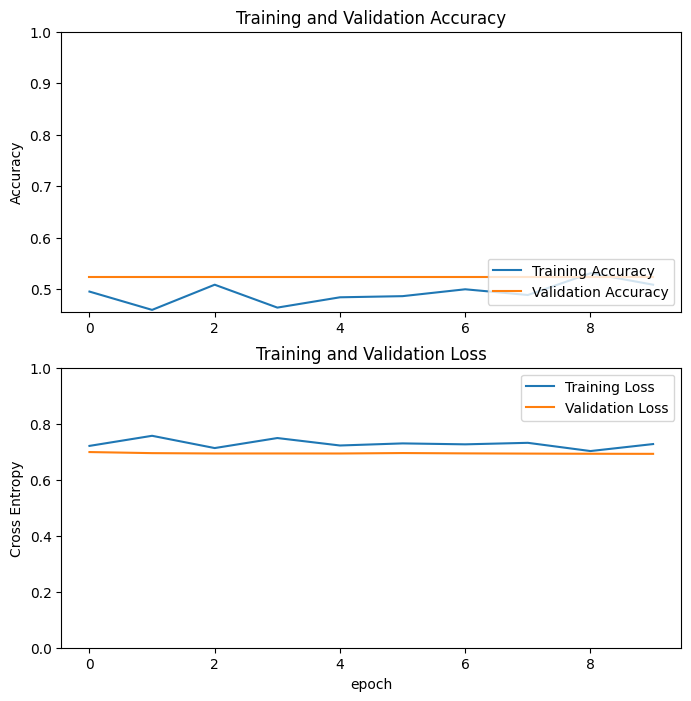

In [89]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

#### Un-freeze the top layers of the model

In [90]:
base_model.trainable = True

In [96]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 20

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [97]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [98]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 10/20
15/15 [==============================] - 3s 58ms/step - loss: 0.7003 - accuracy: 0.4978 - val_loss: 0.6835 - val_accuracy: 0.5246
Epoch 11/20
15/15 [==============================] - 0s 27ms/step - loss: 0.6930 - accuracy: 0.4956 - val_loss: 0.6823 - val_accuracy: 0.5246
Epoch 12/20
15/15 [==============================] - 0s 27ms/step - loss: 0.6973 - accuracy: 0.4956 - val_loss: 0.6798 - val_accuracy: 0.5246
Epoch 13/20
15/15 [==============================] - 0s 27ms/step - loss: 0.6915 - accuracy: 0.5000 - val_loss: 0.6782 - val_accuracy: 0.5246
Epoch 14/20
15/15 [==============================] - 0s 27ms/step - loss: 0.6926 - accuracy: 0.5000 - val_loss: 0.6813 - val_accuracy: 0.5246
Epoch 15/20
15/15 [==============================] - 0s 27ms/step - loss: 0.6898 - accuracy: 0.4978 - val_loss: 0.6766 - val_accuracy: 0.5246
Epoch 16/20
15/15 [==============================] - 0s 27ms/step - loss: 0.6871 - accuracy: 0.5022 - val_loss: 0.6735 - val_accuracy: 0.5246
Epoch 

In [99]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

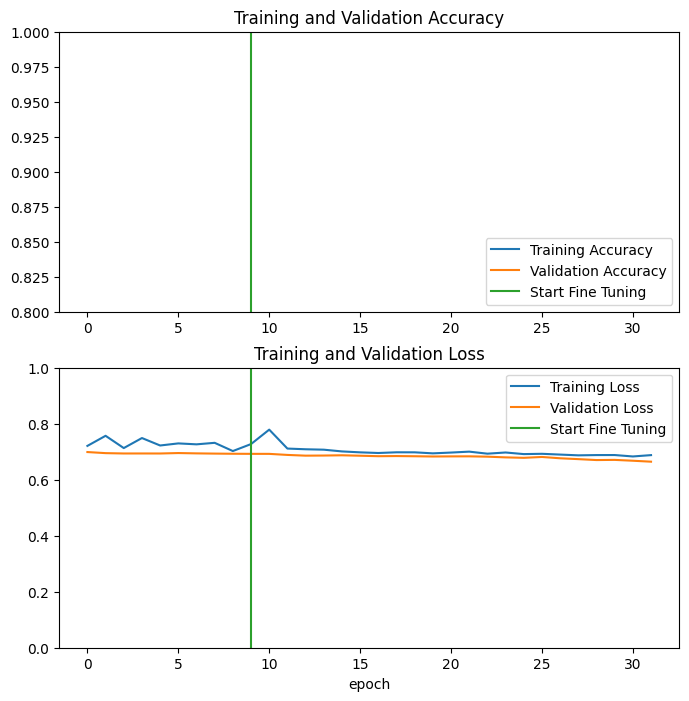

In [100]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Efficient Net

In [25]:
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
base_model.trainable = False

16719872/16705208 [==============================] - 1s 0us/step


In [26]:
from tensorflow.keras import layers

inputs = layers.Input(shape = (224,224,3), name='inputLayer')
x = base_model(inputs, training = False)
x = layers.GlobalAveragePooling2D(name='poolingLayer')(x)
x = layers.Dense(101, name='outputLayer')(x)
outputs = layers.Activation(activation="softmax", dtype=tf.float32, name='activationLayer')(x)

model = tf.keras.Model(inputs, outputs, name = "FeatureExtractionModel")

In [27]:
for lnum, layer in enumerate(model.layers):
    print(lnum, layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

0 inputLayer True float32 <Policy "float32">
1 efficientnetb0 False float32 <Policy "float32">
2 poolingLayer True float32 <Policy "float32">
3 outputLayer True float32 <Policy "float32">
4 activationLayer True float32 <Policy "float32">


In [35]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])


In [31]:
def tensorboard_callback(directory, name):
    log_dir = directory + "/" + name
    t_c = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
    return t_c

def model_checkpoint(directory, name):
    log_dir = directory + "/" + name
    m_c = tf.keras.callbacks.ModelCheckpoint(filepath=log_dir,
                                             monitor="val_accuracy",
                                             save_best_only=True,
                                             save_weights_only=True,
                                             verbose=1)
    return m_c

In [38]:
!ls

atopiNonAtopiClassify.ipynb	 preprocessing
binaryClassificationAtopy.ipynb  requirements.txt
Checkpoints			 sift
createDatasetAtopiTF.ipynb	 Tensorboard
melanomaSkinEfficentNet.ipynb	 tfLabelling.ipynb


In [40]:
epochs = 1000

In [41]:
hist_model = model.fit(train_dataset,
                       epochs = epochs,
                       steps_per_epoch=len(train_dataset),
                       validation_data=validation_dataset,
                       
                       callbacks=[tensorboard_callback("Tensorboard","model"),                                  model_checkpoint("Checkpoints","model_"+str(epochs)+".ckpt")])

Epoch 1/1000
15/15 [==============================] - ETA: 0s - loss: 0.7175 - accuracy: 0.5133
Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to Checkpoints/model_1000.ckpt
15/15 [==============================] - 1s 79ms/step - loss: 0.7175 - accuracy: 0.5133 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/1000
15/15 [==============================] - ETA: 0s - loss: 0.7282 - accuracy: 0.5089
Epoch 00002: val_accuracy did not improve from 0.50000
15/15 [==============================] - 1s 65ms/step - loss: 0.7282 - accuracy: 0.5089 - val_loss: 0.6990 - val_accuracy: 0.5000
Epoch 3/1000
15/15 [==============================] - ETA: 0s - loss: 0.7230 - accuracy: 0.4867
Epoch 00003: val_accuracy did not improve from 0.50000
15/15 [==============================] - 1s 65ms/step - loss: 0.7230 - accuracy: 0.4867 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 4/1000
15/15 [==============================] - ETA: 0s - loss: 0.7079 - accuracy: 0.5044
Epoch 00004: va

In [34]:
base_model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 50

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  237
